# 1. Prepare environment

In [104]:
# loading libraries for tabular data handling
import pandas as pd
import numpy as np
import re

# loading libraries for visualising data
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
import time
timestr = time.strftime('%y%m%d')
print(timestr)

240710


In [106]:
def countplot(data, x, order=None, hue=None, hue_order=None, ax=None, palette='Spectral', title='', show=True,):
    if hue is None:
        palette = None

    sns.countplot(data=data, x=x, order=order, hue=hue, hue_order=hue_order, palette=palette, ax=ax)

    if hue is not None:
        plt.legend(title=hue)

    plt.xticks(rotation=90)
    plt.title(title)

    # saving figure
    png_name = re.sub('- ', '', title.lower())
    png_name = re.sub(' ', '_', png_name)
    plt.savefig(timestr + png_name + '.png')

    # show plot
    if show == True:
      plt.show()
    else:
      plt.close()

##### Sofie's path (can be skipped)

In [107]:
'''
import os
path = '/Users/an70wm/Dropbox/3. Projects/Nordhavn Living Lab (KU)/4. Data/Photovoice data/'
os.chdir(path)
'''

"\nimport os\npath = '/Users/an70wm/Dropbox/3. Projects/Nordhavn Living Lab (KU)/4. Data/Photovoice data/'\nos.chdir(path)\n"

In [108]:
# load data
df = pd.read_csv('2024.07.09 photovoice_cleaned.csv')

In [109]:
df.head(2)

,photo_id,user_id,date,lat,long,url_thumb,url_original,appeal,biodiversity_perceived,nature_elements,...,gender,age,occupation,years_in_cph,zipcode,edu_1,sexual_orientation,racial_identity,physical_disability,mental_issue
0,76d4c873-3b4f-4fb9-9085-10b7104c4c1d,f48014f1-41e6-490f-9fce-b769514e2c0f,25-04-2024,55.71664,12.609841,https://urbanbelonging.app/minio/photo-uploads...,https://urbanbelonging.app/minio/photo-uploads...,5,5,"Grass, Trees, Flowers, Other vegetation, Birds...",...,Cis female/cis woman,25.0,Student,2-5 years,Not Copenhagen,Intermediate higher education (Mellemlang Vide...,NaN,NaN,NaN,NaN
1,da370966-93f3-4bfb-9ad1-b54aace7f320,98981014-9d6c-4e37-8394-494d4f0436a6,21-05-2024,55.72324,12.608316,https://urbanbelonging.app/minio/photo-uploads...,https://urbanbelonging.app/minio/photo-uploads...,4,4,"Trees, Grass, Flowers, Other vegetation, Soil,...",...,Cis female/cis woman,56.0,Professor,2-5 years,Not Copenhagen,PhD Degree (Doktorgrad),NaN,NaN,NaN,NaN


In [110]:
df.columns

Index(['photo_id', 'user_id', 'date', 'lat', 'long', 'url_thumb',
       'url_original', 'appeal', 'biodiversity_perceived', 'nature_elements',
       'nature_quality', 'social_quality', 'sounds', 'v1_ne_trees',
       'v1_ne_grass', 'v1_ne_flowers', 'v1_ne_other_vegetation',
       'v1_ne_stones/rocks', 'v1_ne_soil', 'v1_ne_gravel', 'v1_ne_water',
       'v1_ne_birds', 'v1_ne_dogs', 'v1_ne_insects',
       'v1_ne_other_non_human_species', 'v1_ne_wind', 'v1_ne_rain',
       'v1_ne_sun', 'v1_ne_other', 'v2_nq_abundant', 'v2_nq_monotonous',
       'v2_nq_messy', 'v2_nq_ordered', 'v2_nq_pretty', 'v2_nq_ugly',
       'v2_nq_protected', 'v2_nq_unequally_distributed',
       'v2_nq_well_cared_for', 'v2_nq_politically_driven', 'v2_nq_wild',
       'v2_nq_conventional', 'v2_nq_other', 'v3_sq_accessible',
       'v3_sq_not_accessible', 'v3_sq_well_protected', 'v3_sq_over_protected',
       'v3_sq_welcoming', 'v3_sq_excluding', 'v3_sq_peaceful',
       'v3_sq_stressful', 'v3_sq_feels_safe', 'v3_

# 2. Frequencies
- pivot tables
- countplots

In [111]:
df.pivot_table()

ValueError: No group keys passed!

In [ ]:
sns.set_palette('coolwarm_r')

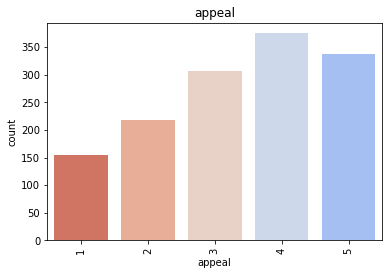

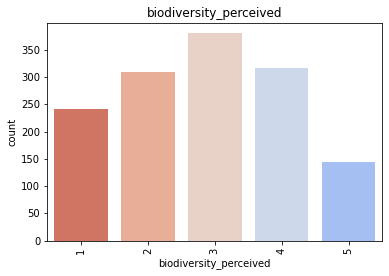

In [112]:
for col in 'appeal', 'biodiversity_perceived':
    countplot(df, col, title=col)

In [113]:
cat_dict = {'nature_elements': ['Trees', 'Grass', 'Flowers', 'Other vegetation',
                                    'Stones/rocks', 'Soil', 'Gravel', 'Water', 'Birds',
                                    'Dogs', 'Insects', 'Other non-human species',
                                    'Wind', 'Rain', 'Sun'],
            'nature_quality': ['Abundant', 'Monotonous', 'Messy', 'Ordered',
                                   'Pretty', 'Ugly', 'Protected', 'Unequally distributed',
                                   'Well cared for', 'Politically driven', 'Wild',
                                   'Conventional'],
            'social_quality': ['Accessible', 'Not accessible', 'Well-protected',
                                   'Over-protected', 'Welcoming', 'Excluding', 'Peaceful',
                                   'Stressful', 'Feels safe', 'Feels unsafe', 'Feeling of belonging',
                                   'Feeling alienated'],
            'sounds': ['Traffic', 'Construction', 'Birds', 'Human chatter',
                           'Water', 'Wind/weather', 'Insects']}

In [114]:
v1 = ['v1_ne_trees', 'v1_ne_grass', 'v1_ne_flowers', 'v1_ne_other_vegetation',
       'v1_ne_stones/rocks', 'v1_ne_soil', 'v1_ne_gravel', 'v1_ne_water',
       'v1_ne_birds', 'v1_ne_dogs', 'v1_ne_insects', 'v1_ne_other_non_human_species', 
       'v1_ne_wind', 'v1_ne_rain', 'v1_ne_sun']
v2 = ['v2_nq_abundant', 'v2_nq_monotonous', 'v2_nq_messy', 'v2_nq_ordered', 
      'v2_nq_pretty', 'v2_nq_ugly', 'v2_nq_protected', 'v2_nq_unequally_distributed',
      'v2_nq_well_cared_for', 'v2_nq_politically_driven', 'v2_nq_wild',
      'v2_nq_conventional']
v3 = ['v3_sq_accessible', 'v3_sq_not_accessible', 'v3_sq_well_protected', 
      'v3_sq_over_protected', 'v3_sq_welcoming', 'v3_sq_excluding', 'v3_sq_peaceful',
       'v3_sq_stressful', 'v3_sq_feels_safe', 'v3_sq_feels_unsafe',
       'v3_sq_feeling_of_belonging', 'v3_sq_feeling_alienated']
v4 = ['v4_s_traffic', 'v4_s_construction', 'v4_s_birds', 'v4_s_human_chatter',
      'v4_s_water', 'v4_s_wind/weather', 'v4_s_insects']

In [115]:
v1_dict = {key:value for key, value in zip(v1, cat_dict['nature_elements'])}
v2_dict = {key:value for key, value in zip(v2, cat_dict['nature_quality'])}
v3_dict = {key:value for key, value in zip(v3, cat_dict['social_quality'])}
v4_dict = {key:value for key, value in zip(v4, cat_dict['sounds'])}

other = ['v1_ne_other', 'v2_nq_other', 'v3_sq_other', 'v4_s_other']

In [116]:
v1_dict

{'v1_ne_trees': 'Trees',
 'v1_ne_grass': 'Grass',
 'v1_ne_flowers': 'Flowers',
 'v1_ne_other_vegetation': 'Other vegetation',
 'v1_ne_stones/rocks': 'Stones/rocks',
 'v1_ne_soil': 'Soil',
 'v1_ne_gravel': 'Gravel',
 'v1_ne_water': 'Water',
 'v1_ne_birds': 'Birds',
 'v1_ne_dogs': 'Dogs',
 'v1_ne_insects': 'Insects',
 'v1_ne_other_non_human_species': 'Other non-human species',
 'v1_ne_wind': 'Wind',
 'v1_ne_rain': 'Rain',
 'v1_ne_sun': 'Sun'}

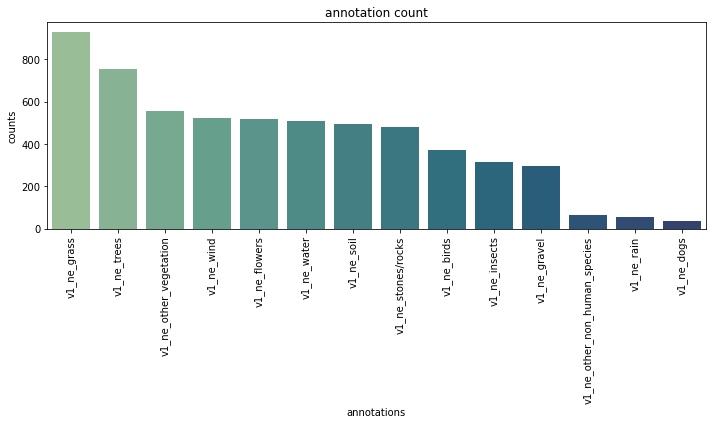

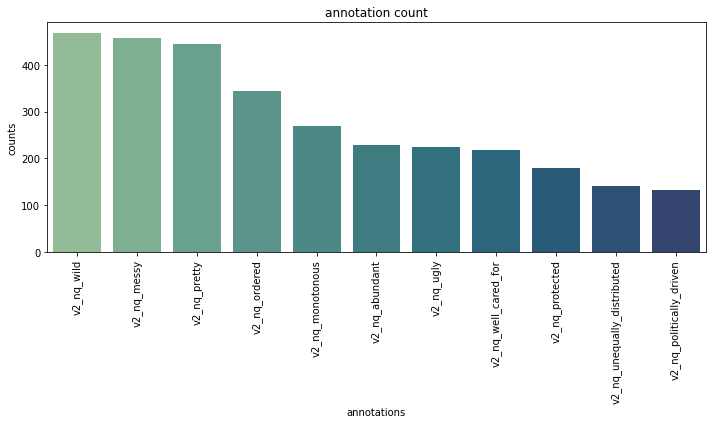

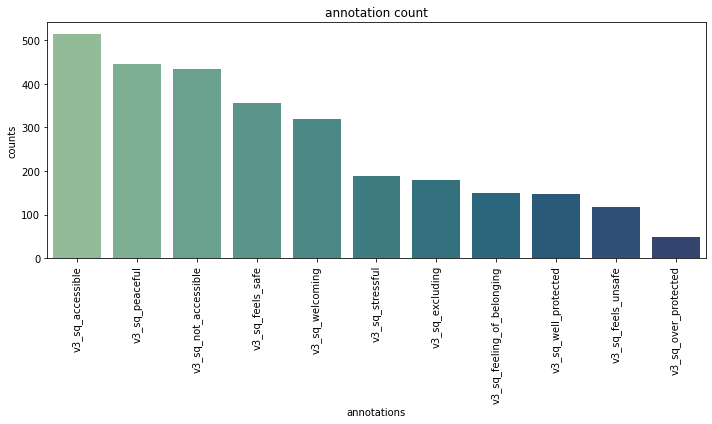

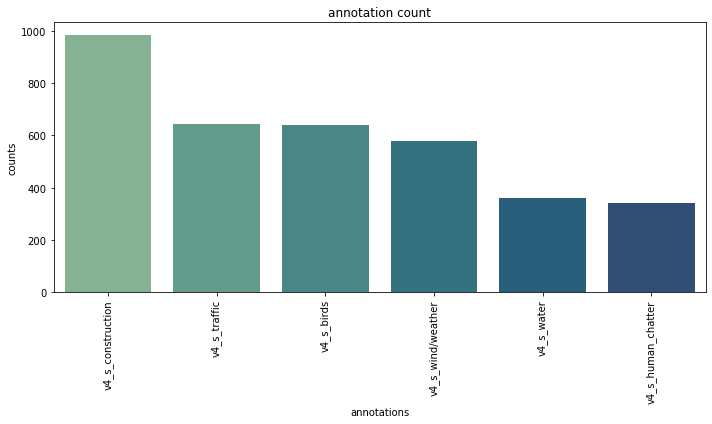

In [122]:
for variable in [v1, v2, v3, v4]:
    temp_series = df[variable].sum()[:-1]

    # Sort the Series in descending order based on values
    temp_series_sorted = temp_series.sort_values(ascending=False)

    # Plotting with seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x=temp_series_sorted.index, y=temp_series_sorted.values, palette="crest")
    plt.xticks(rotation=90)
    plt.xlabel('annotations')
    plt.ylabel('counts')
    plt.title('annotation count')
    plt.tight_layout()
    plt.show()

<AxesSubplot:xlabel='appeal', ylabel='biodiversity_perceived'>

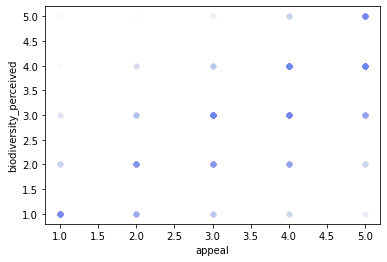

In [124]:
sns.scatterplot(data=df, x='appeal', y='biodiversity_perceived', alpha=0.01, color='#6788ee')

In [119]:
sns.scatterplot(data=df, x='appeal', y=['v4_s_construction', 'v4_s_traffic'], alpha=0.01, color="#6788ee")
# plt.savefig('rating_per-category_12-12.png')

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 1392 and the vector passed to `y` has length 2.

# 3. Co-occurrences

# Category matrix

In [90]:
df.columns

Index(['photo_id', 'user_id', 'date', 'lat', 'long', 'url_thumb',
       'url_original', 'appeal', 'biodiversity_perceived', 'nature_elements',
       'nature_quality', 'social_quality', 'sounds', 'v1_ne_trees',
       'v1_ne_grass', 'v1_ne_flowers', 'v1_ne_other_vegetation',
       'v1_ne_stones/rocks', 'v1_ne_soil', 'v1_ne_gravel', 'v1_ne_water',
       'v1_ne_birds', 'v1_ne_dogs', 'v1_ne_insects',
       'v1_ne_other_non_human_species', 'v1_ne_wind', 'v1_ne_rain',
       'v1_ne_sun', 'v1_ne_other', 'v2_nq_abundant', 'v2_nq_monotonous',
       'v2_nq_messy', 'v2_nq_ordered', 'v2_nq_pretty', 'v2_nq_ugly',
       'v2_nq_protected', 'v2_nq_unequally_distributed',
       'v2_nq_well_cared_for', 'v2_nq_politically_driven', 'v2_nq_wild',
       'v2_nq_conventional', 'v2_nq_other', 'v3_sq_accessible',
       'v3_sq_not_accessible', 'v3_sq_well_protected', 'v3_sq_over_protected',
       'v3_sq_welcoming', 'v3_sq_excluding', 'v3_sq_peaceful',
       'v3_sq_stressful', 'v3_sq_feels_safe', 'v3_

In [91]:
# Keep the rows where a category is added
df_cleaned = df.dropna(subset=v1)

In [92]:
# Extract unique categories
df_cleaned['nature_elements'] = df_cleaned['nature_elements'].apply(eval)
unique_categories = set(category for categories in df_cleaned['nature_elements'] for category in categories)

SyntaxError: invalid syntax (<string>, line 1)

In [ ]:
# Create a binary matrix
binary_matrix = pd.DataFrame(0, index=gdf_cleaned.index, columns=unique_categories)

for index, row in gdf_cleaned.iterrows():
    for category in row['category']:
        binary_matrix.at[index, category] = 1

# Remove columns with all zeros
binary_matrix = binary_matrix.loc[:, (binary_matrix != 0).any(axis=0)]

# Concatenate the binary matrix DataFrame with the original DataFrame
gdf_encoded = pd.concat([gdf_cleaned, binary_matrix], axis=1)

In [ ]:
# Calculate the co-occurrence matrix
co_occurrence_matrix = binary_matrix.T.dot(binary_matrix)